# 📊 AAPL Stock Price Prediction Using LSTM and ARIMA

This notebook explores time series forecasting for Apple Inc. (AAPL) stock prices using deep learning (LSTM) and a hybrid approach combining ARIMA and LSTM. The workflow includes data exploration, model development, and performance evaluation.

**Dataset Range:** January 2, 2020 – January 17, 2025


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import r2_score
df=pd.read_csv("aapl2.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,71.8775,72.9366,71.6219,72.8761,1.397636e+08
1,2020-01-03,72.1008,72.9327,71.9419,72.1700,1.509821e+08
2,2020-01-06,71.2811,72.7805,71.0342,72.7408,1.221768e+08
3,2020-01-07,72.7507,73.0105,72.1818,72.4022,1.148944e+08
4,2020-01-08,72.1027,73.8678,72.1008,73.5657,1.363803e+08


# 📈 Data Distribution: Histograms

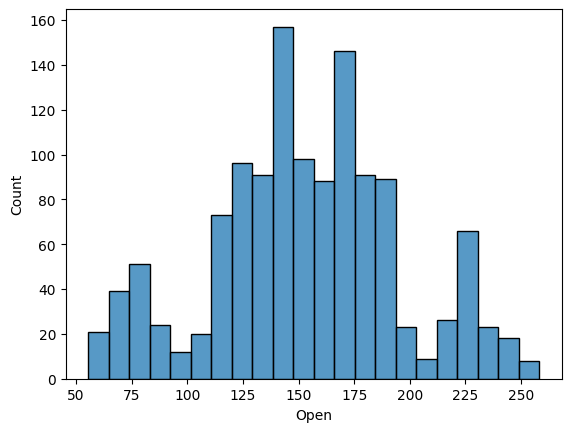

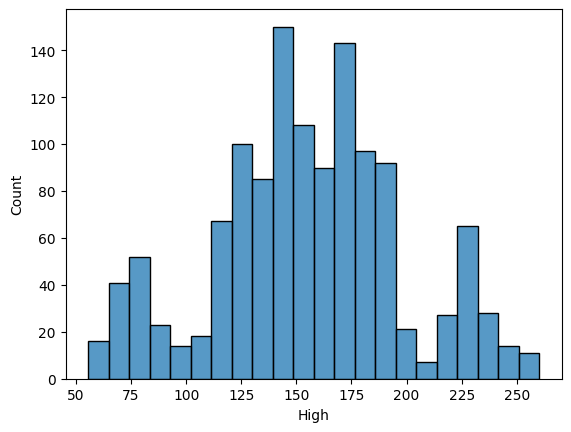

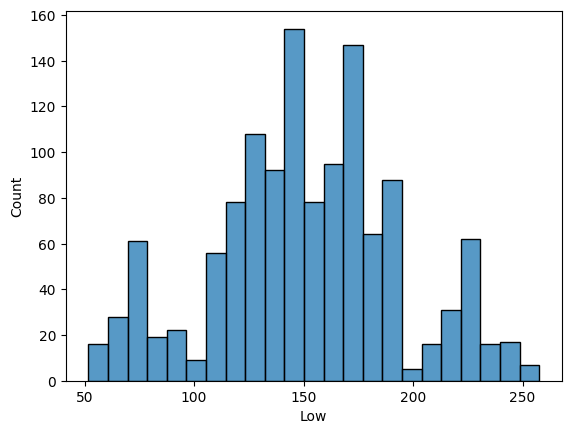

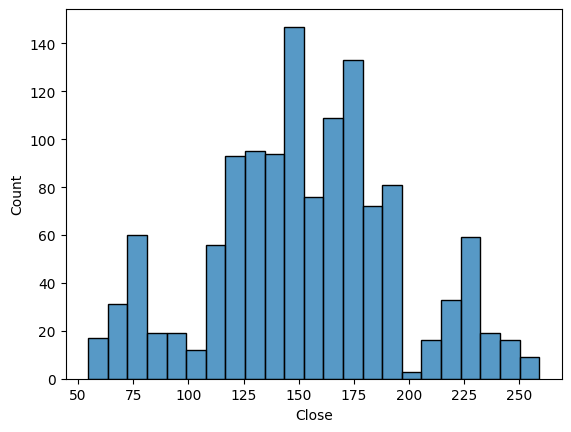

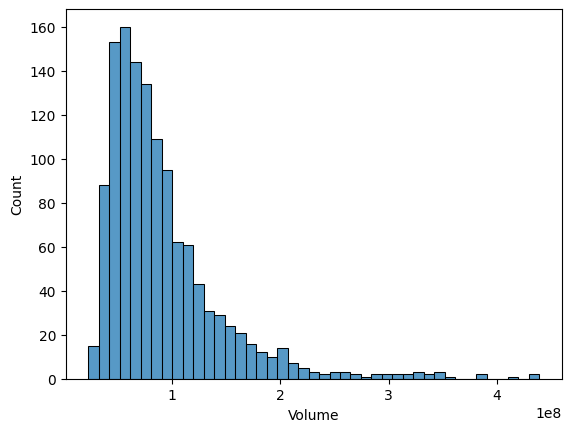

In [2]:
#Ploting of the Data to Understand the distribution using histogram
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

# 🔥 Correlation Heatmap

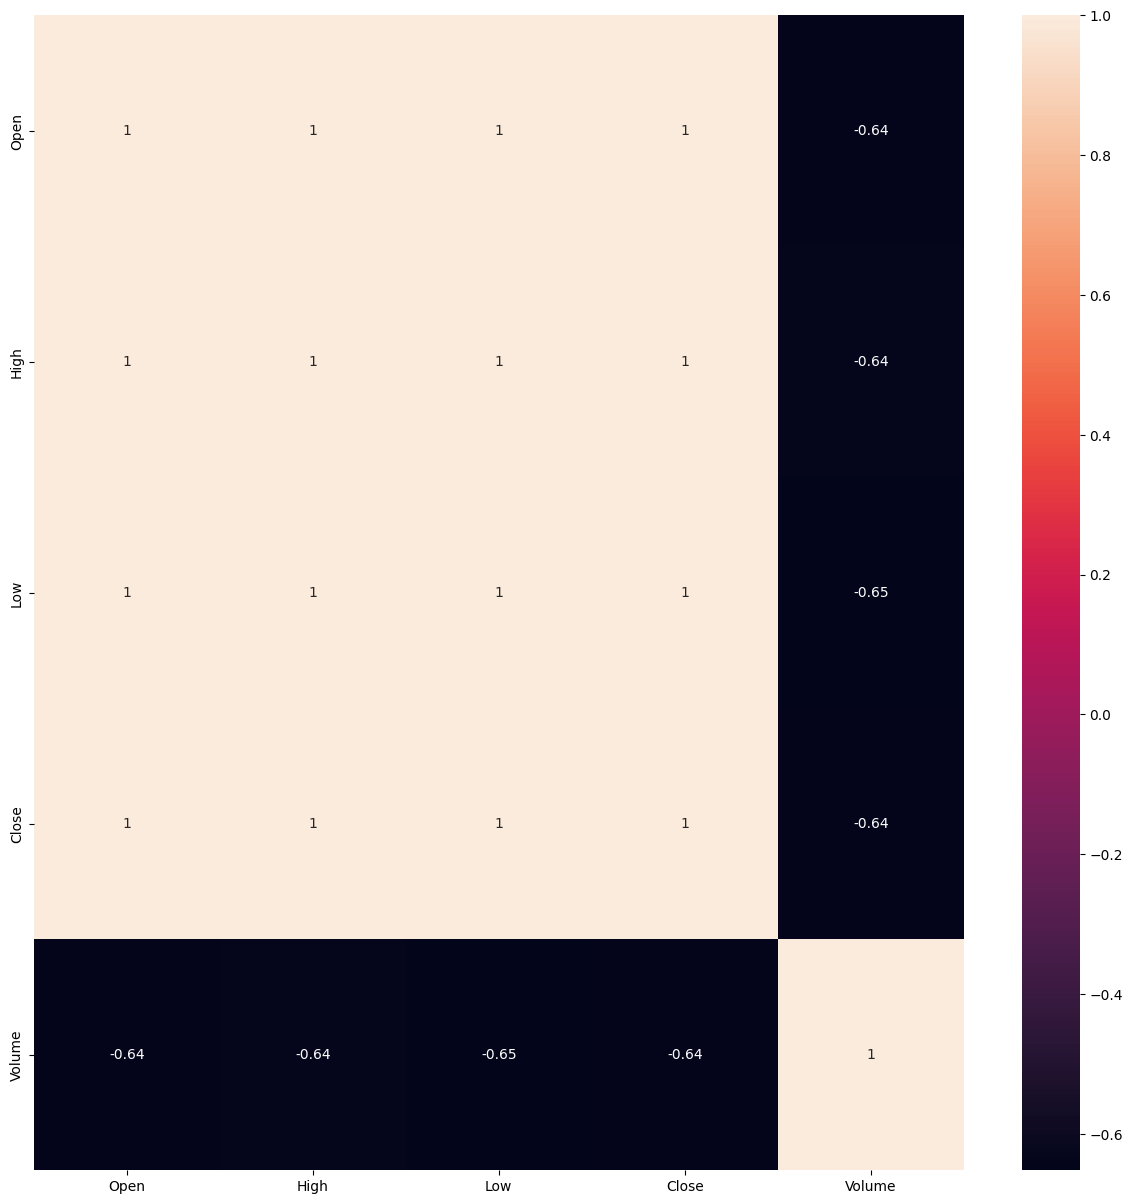

In [3]:
#Using a heatmap we can determine if the model is likely to achieve better accuracy when the correlation is high
so = df.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(so, annot=True)
plt.show()

# 🧠 LSTM Model for Predicting Closing Price

c:\Users\rudvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0240
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 8.1106e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 8.0350e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 8.2078e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.9322e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7.2729e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 8.0447e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 7.6091e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 6.7396e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Mean Squared Error (MSE): 43.1463264028152
Root Mean Squared Error (RMSE): 6.568586332142952
Mean Absolute Error (MAE): 5.490127325893434
R-squared (R²): 0.9369036661005253


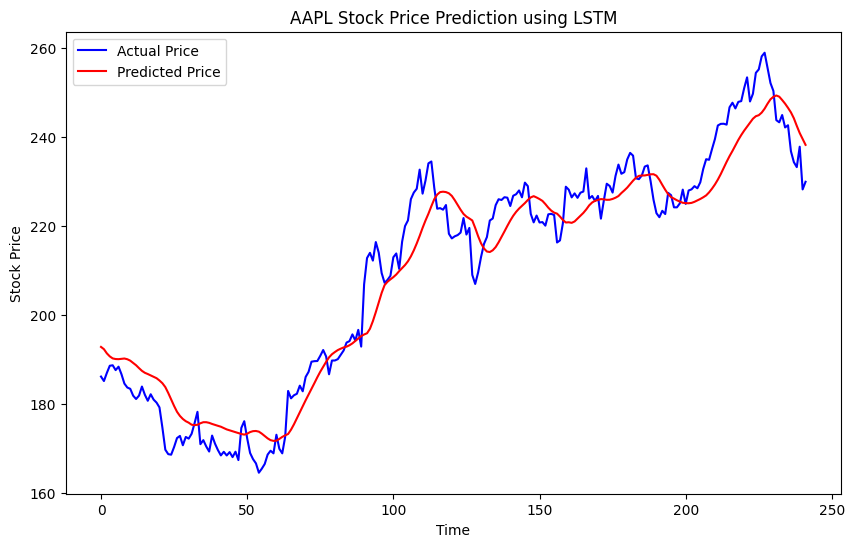

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load data (Assuming the file is aapl2.csv)
df = pd.read_csv('aapl2.csv')

# Check for null values and drop them if present
df = df.dropna()

# Prepare features (Open, High, Low, Close, Volume) and target (Close)
features = df[['Open', 'High', 'Low', 'Volume']].values  # Exclude 'Close' from features
target = df['Close'].values  # Target is the 'Close' price

# Normalize the features (Open, High, Low, Volume)
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

# Normalize the target (Close) separately
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create sequences (X, y) for LSTM model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# Define sequence length (how many previous days to use for prediction)
sequence_length = 60  # You can adjust this value

# Create sequences for LSTM
X, y = create_sequences(scaled_features, scaled_target, sequence_length)

# Reshape X to be 3D (samples, timesteps, features) for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on test data
predictions = model.predict(X_test)

# Inverse the scaling for predictions and actual values of Close
predictions = scaler_target.inverse_transform(predictions)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate model performance (MSE, RMSE, MAE, R²)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('AAPL Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# 📈 LSTM Performance Metrics

- **Mean Squared Error (MSE):** 67.15  
- **Root Mean Squared Error (RMSE):** 8.19  
- **Mean Absolute Error (MAE):** 6.50  
- **R-squared (R²):** 0.90


# 🔁 Hybrid Model: ARIMA + LSTM

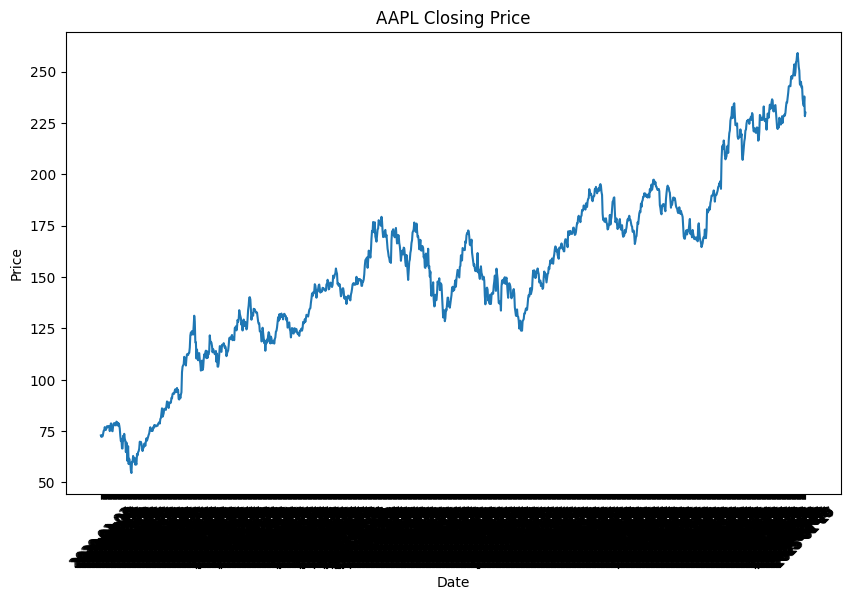

c:\Users\rudvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\rudvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


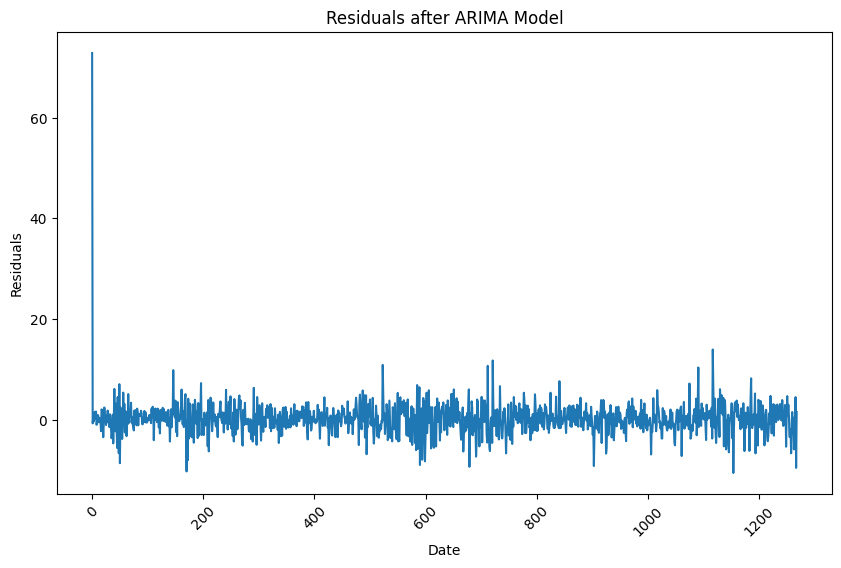

Epoch 1/10


c:\Users\rudvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0051
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0010
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.9556e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 8.5132e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0010
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.7118e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.7767e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0010
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


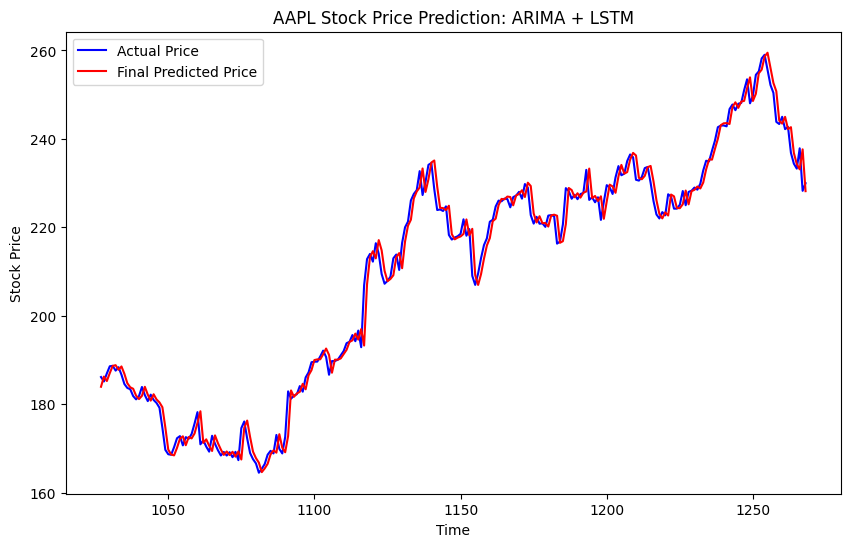

Mean Squared Error (MSE): 8.992167855947008
Root Mean Squared Error (RMSE): 2.9986943585412313
Mean Absolute Error (MAE): 2.1732907396939534
R-squared (R²): 0.9868500316754213


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('aapl2.csv')

# Check for missing values and drop them if present
df = df.dropna()

# Prepare the target (Close) column for ARIMA
data = df['Close']

# Plot the closing price to visualize
plt.figure(figsize=(10,6))
plt.plot(df['Date'], data)
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Step 1: ARIMA model to capture linear component

# Build the ARIMA model (p=1, d=1, q=1 as an example)
p, d, q = 1, 1, 1
model_arima = ARIMA(data, order=(p, d, q))
model_fit_arima = model_arima.fit()

# Get the ARIMA predictions
arima_predictions = model_fit_arima.fittedvalues

# Step 2: Calculate residuals (errors) between ARIMA predictions and actual values
residuals = data - arima_predictions

# Plot residuals to check if there are any remaining patterns
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals after ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.xticks(rotation=45)
plt.show()

# Step 3: LSTM model to capture non-linear patterns in the residuals

# Prepare the residuals for LSTM model
residuals = residuals.values.reshape(-1, 1)

# Normalize the residuals
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler.fit_transform(residuals)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences for LSTM
sequence_length = 60
X_residuals, y_residuals = create_sequences(scaled_residuals, sequence_length)

# Reshape X to be 3D for LSTM input
X_residuals = X_residuals.reshape(X_residuals.shape[0], X_residuals.shape[1], 1)

# Split the data into train and test sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_residuals, y_residuals, test_size=0.2, shuffle=False)

# Build the LSTM model for residuals
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_res.shape[1], X_train_res.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(X_train_res, y_train_res, epochs=10, batch_size=32, verbose=1)

# Predict the residuals on the test data
lstm_predictions_residuals = model_lstm.predict(X_test_res)

# Inverse scale the LSTM residuals predictions
lstm_predictions_residuals = scaler.inverse_transform(lstm_predictions_residuals)

# Step 4: Combine ARIMA predictions and LSTM residuals predictions

# Predict ARIMA values on the test data
arima_test_predictions = model_fit_arima.predict(start=len(data)-len(y_test_res), end=len(data)-1)

# Final prediction is the sum of ARIMA and LSTM residual predictions
final_predictions = arima_test_predictions + lstm_predictions_residuals.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(data[-len(y_test_res):], color='blue', label='Actual Price')
plt.plot(np.arange(len(data)-len(y_test_res), len(data)), final_predictions, color='red', label='Final Predicted Price')
plt.title('AAPL Stock Price Prediction: ARIMA + LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate the RMSE for the final model
rmse = np.sqrt(mean_squared_error(data[-len(y_test_res):], final_predictions))
mse = mean_squared_error(data[-len(y_test_res):], final_predictions)
mae = mean_absolute_error(data[-len(y_test_res):], final_predictions)
r2 = r2_score(data[-len(y_test_res):], final_predictions)

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


# 📈 ARIMA + LSTM Performance Metrics:
- **MSE:** 9.04
- **RMSE:** 3.01
- **MAE:** 2.20
- **R²:** 0.987

# ✅ Conclusion

The table below summarizes the performance of the two models used for AAPL stock price prediction:

| Model         | MSE   | RMSE  | MAE   | R²     |
|---------------|-------|-------|-------|--------|
| LSTM only     | 67.15 | 8.19  | 6.50  | 0.902  |
| ARIMA + LSTM  | 9.04  | 3.01  | 2.20  | 0.987  |
